# Exploratory Data Analysis (EDA)
This notebook explores patterns in NYC 311 noise complaints after data cleaning.

The analysis focuses on:
- Temporal patterns (hourly, daily, seasonal)
- Geographic distribution (boroughs and neighborhoods)
- Complaint type composition
- High-level data quality checks

All visualizations are saved to the `outputs/` directory.

## Imports & Configuration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

## Load Cleaned Data

In [3]:
df = pd.read_csv("../data/processed/noise_cleaned.csv")

df.head()

,Unique Key,Created Date,Problem,Problem Detail,Additional Details,Incident Zip,Borough,Latitude,Longitude,Year,Month,Week,Day_of_Week,Day_Name,Hour,Date,Time_Bucket,Season,Neighborhood
0,67896007,2026-02-09 02:04:44,Noise - Residential,Loud Music/Party,NaN,10453.0,BRONX,40.852196,-73.922327,2026,2,7,0,Monday,2,2026-02-09,overnight,Winter,Central Bronx
1,67895994,2026-02-09 02:03:44,Noise - Residential,Banging/Pounding,NaN,10033.0,MANHATTAN,40.852452,-73.931685,2026,2,7,0,Monday,2,2026-02-09,overnight,Winter,Inwood and Washington Heights
2,67903232,2026-02-09 02:03:09,Noise - Residential,Loud Music/Party,NaN,11207.0,BROOKLYN,40.665642,-73.898794,2026,2,7,0,Monday,2,2026-02-09,overnight,Winter,East New York and New Lots
3,67897801,2026-02-09 02:02:03,Noise - Residential,Loud Music/Party,NaN,10472.0,BRONX,40.832097,-73.881112,2026,2,7,0,Monday,2,2026-02-09,overnight,Winter,Southeast Bronx
4,67897784,2026-02-09 02:00:28,Noise - Residential,Banging/Pounding,NaN,10457.0,BRONX,40.848521,-73.897944,2026,2,7,0,Monday,2,2026-02-09,overnight,Winter,Central Bronx


## Temporal Patterns
This section examines how noise complaints vary across seasons, days, hours, and months.

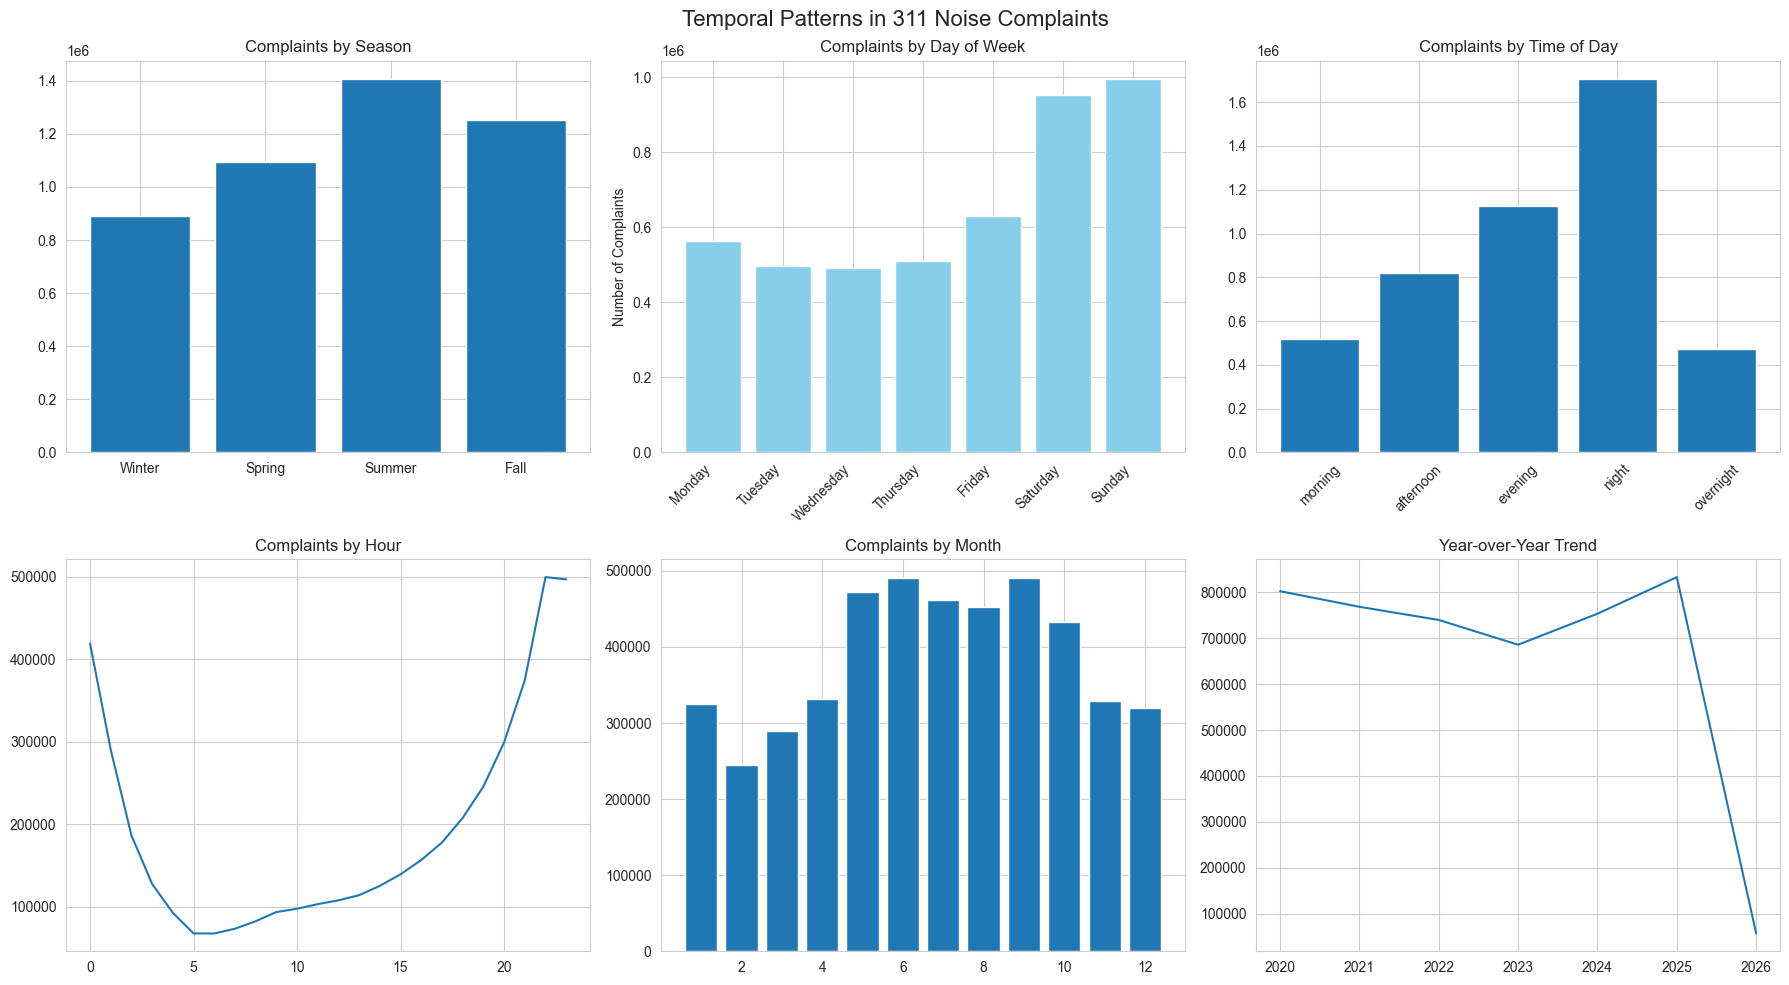

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Temporal Patterns in 311 Noise Complaints', fontsize=16)

# Season
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_counts = df['Season'].value_counts().reindex(season_order)
axes[0, 0].bar(season_counts.index, season_counts.values)
axes[0, 0].set_title('Complaints by Season')

# Day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day_Name'].value_counts().reindex(day_order)
axes[0, 1].bar(range(len(day_counts)), day_counts.values, color='skyblue')
axes[0, 1].set_xticks(range(len(day_counts)))
axes[0, 1].set_xticklabels(day_order, rotation=45, ha='right')
axes[0, 1].set_title('Complaints by Day of Week')
axes[0, 1].set_ylabel('Number of Complaints')

# Time bucket
time_order = ['morning', 'afternoon', 'evening', 'night', 'overnight']
time_counts = df['Time_Bucket'].value_counts().reindex(time_order)
axes[0, 2].bar(time_counts.index, time_counts.values)
axes[0, 2].set_title('Complaints by Time of Day')
axes[0, 2].tick_params(axis='x', rotation=45)

# Hourly
hour_counts = df['Hour'].value_counts().sort_index()
axes[1, 0].plot(hour_counts.index, hour_counts.values)
axes[1, 0].set_title('Complaints by Hour')

# Monthly
month_counts = df['Month'].value_counts().sort_index()
axes[1, 1].bar(month_counts.index, month_counts.values)
axes[1, 1].set_title('Complaints by Month')

# Year trend
if df['Year'].nunique() > 1:
    year_counts = df['Year'].value_counts().sort_index()
    axes[1, 2].plot(year_counts.index, year_counts.values)
    axes[1, 2].set_title('Year-over-Year Trend')
else:
    axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('../outputs/01_temporal_patterns.png', dpi=300)
plt.show()



## Geographic Patterns
This section explores how complaint volume varies by borough and neighborhood.

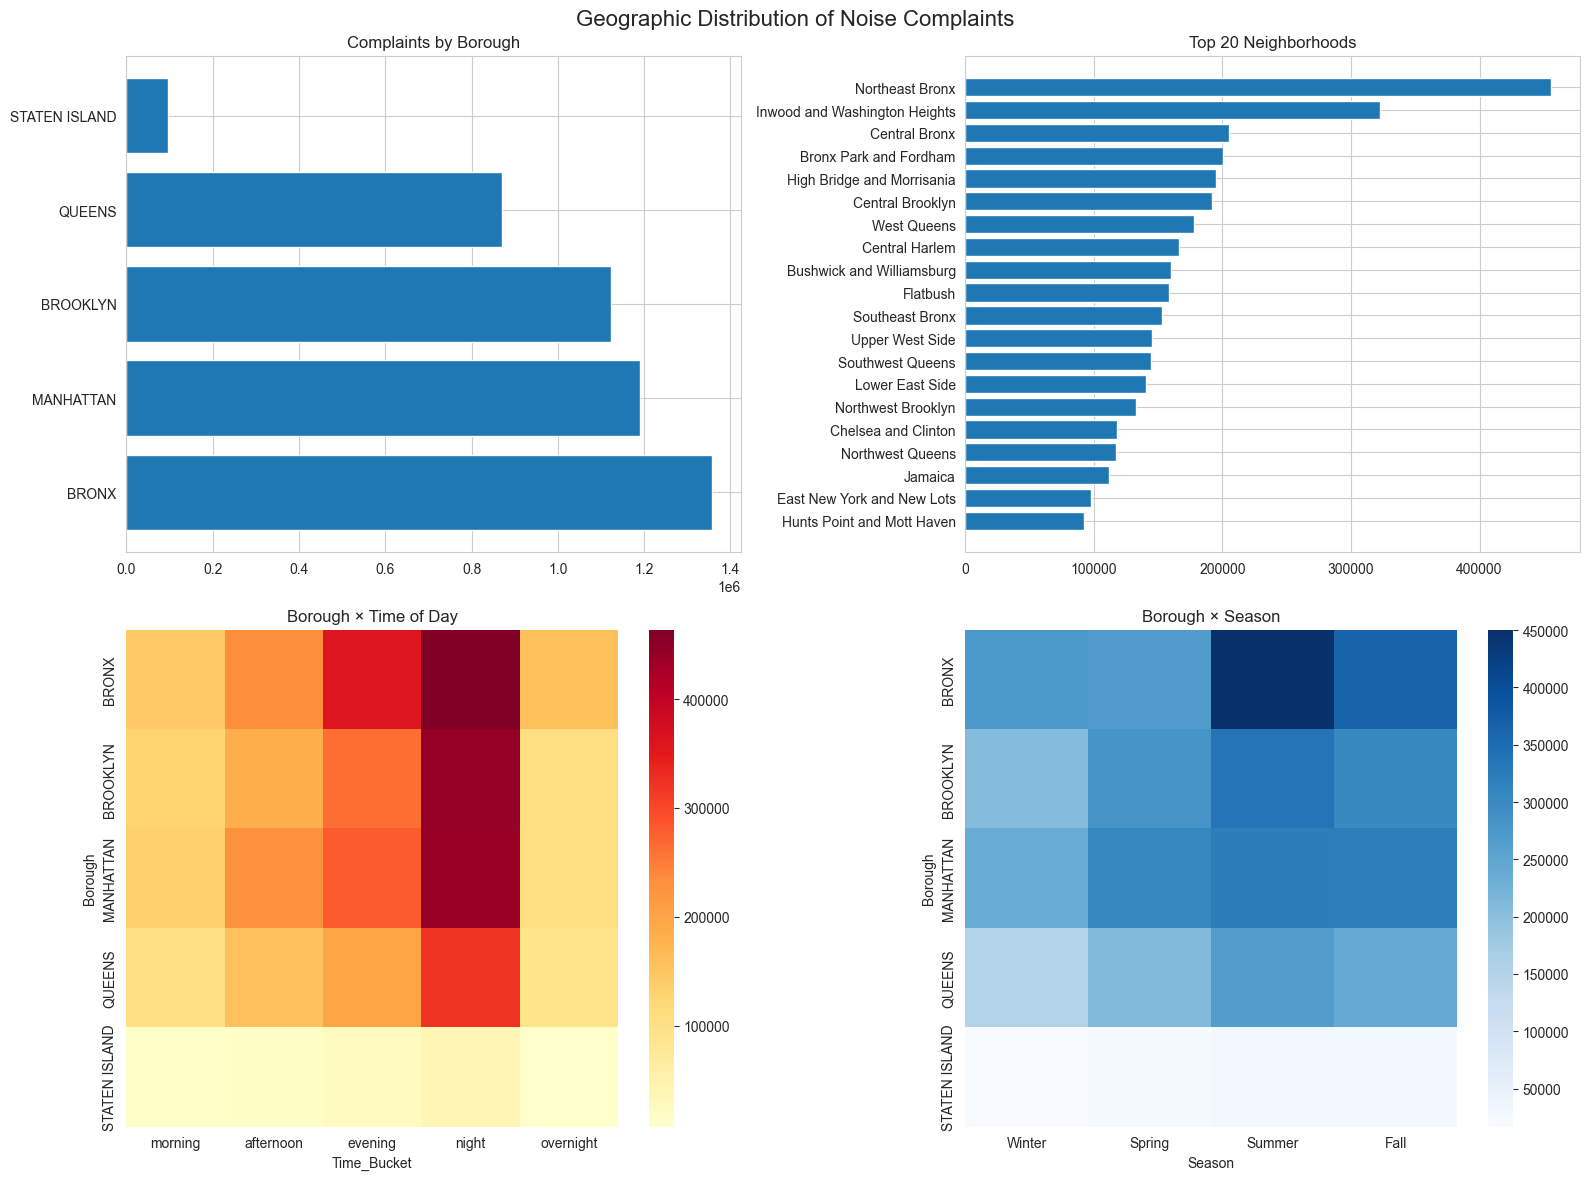

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographic Distribution of Noise Complaints', fontsize=16)

# Borough totals
borough_counts = df['Borough'].value_counts()
axes[0, 0].barh(borough_counts.index, borough_counts.values)
axes[0, 0].set_title('Complaints by Borough')

# Top neighborhoods
top_neighborhoods = df['Neighborhood'].value_counts().head(20)
axes[0, 1].barh(top_neighborhoods.index, top_neighborhoods.values)
axes[0, 1].invert_yaxis()
axes[0, 1].set_title('Top 20 Neighborhoods')

# Borough × Time
borough_time = pd.crosstab(df['Borough'], df['Time_Bucket'])[time_order]
sns.heatmap(borough_time, cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('Borough × Time of Day')

# Borough × Season
borough_season = pd.crosstab(df['Borough'], df['Season'])[season_order]
sns.heatmap(borough_season, cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Borough × Season')

plt.tight_layout()
plt.savefig('../outputs/02_geographic_patterns.png', dpi=300)
plt.show()


## Complaint Type Analysis

This section examines the most common noise complaint categories and how they differ by borough.


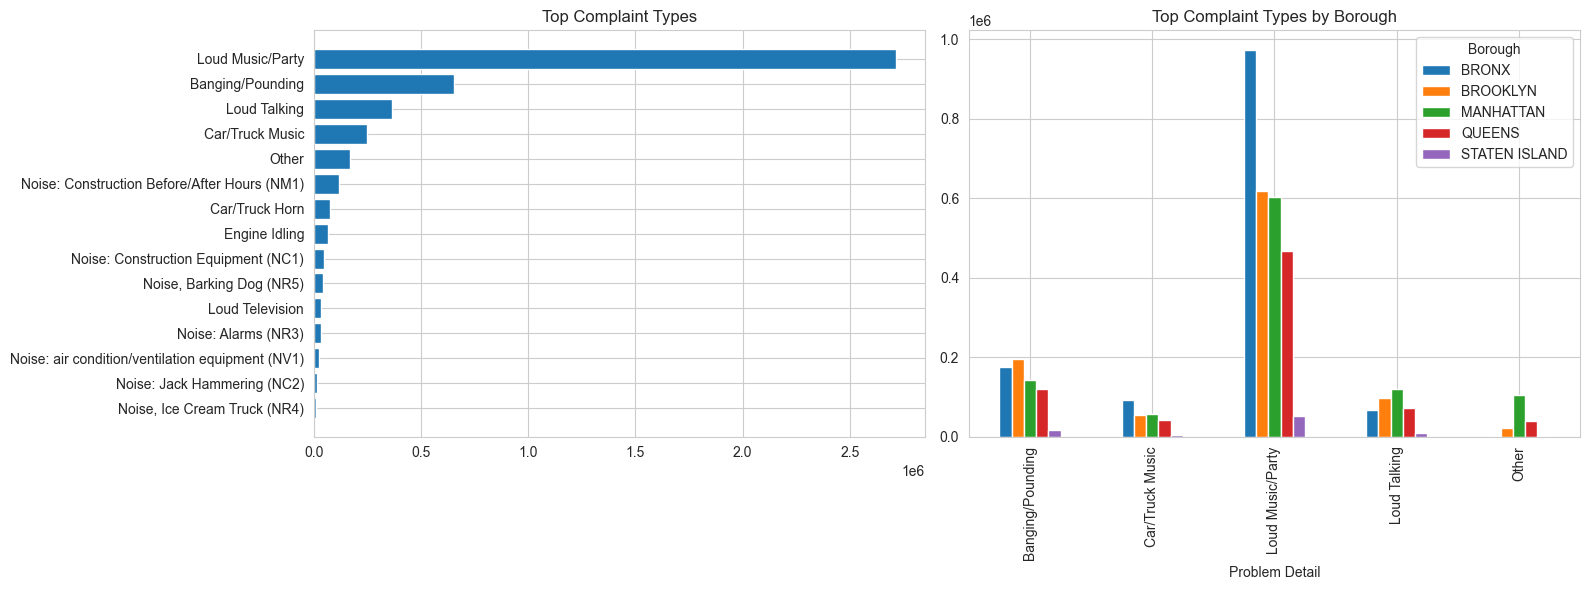

In [6]:
if 'Problem Detail' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    top_types = df['Problem Detail'].value_counts().head(15)
    axes[0].barh(top_types.index, top_types.values)
    axes[0].invert_yaxis()
    axes[0].set_title('Top Complaint Types')

    top_5 = top_types.head(5).index
    subset = df[df['Problem Detail'].isin(top_5)]
    pd.crosstab(subset['Problem Detail'], subset['Borough']).plot(
        kind='bar', ax=axes[1]
    )
    axes[1].set_title('Top Complaint Types by Borough')

    plt.tight_layout()
    plt.savefig('../outputs/03_complaint_types.png', dpi=300)
    plt.show()


## Data Quality Summary

This section provides high-level statistics and checks for missing data.


In [7]:
summary = {
    'Total Records': len(df),
    'Date Range': f"{df['Created Date'].min()} → {df['Created Date'].max()}",
    'Boroughs': df['Borough'].nunique(),
    'Neighborhoods': df['Neighborhood'].nunique(),
    'Zip Codes': df['Incident Zip'].nunique(),
    'Peak Hour': df['Hour'].mode()[0],
    'Peak Day': df['Day_Name'].mode()[0],
    'Peak Season': df['Season'].mode()[0],
}

pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

,Value
Total Records,4639338
Date Range,2020-01-01 00:01:37 → 2026-02-09 02:04:44
Boroughs,5
Neighborhoods,42
Zip Codes,235
Peak Hour,22
Peak Day,Sunday
Peak Season,Summer


## Export Summary Statistics

In [8]:
summary_df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
summary_df.to_csv('../outputs/summary_statistics.csv', index=False)
